<a href="https://colab.research.google.com/github/RodrigoRVSN/deidara/blob/main/05_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# Histograma

Neste notebook, iremos aprender como calcular o histograma da imagem.

Primeiro, iremos importar as principais bibliotecas.

In [ ]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

## Histograma de uma imagem em tons de cinza

Iremos fazer o download de uma imagem.

In [ ]:
pathFolder = 'figs/'

# verifica que a pasta existe
if not os.path.exists(pathFolder):
    # cria a pasta
    os.makedirs(pathFolder)

url = 'https://i.pinimg.com/originals/58/e8/57/58e8573cd99fa533af68d13e0752fcb8.jpg'

urllib.request.urlretrieve(url, pathFolder + "lowContrast.jpg")  

('figs/lowContrast.jpg', <http.client.HTTPMessage at 0x7f85289343a0>)

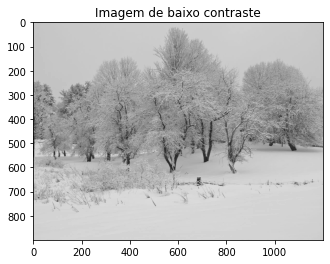

In [ ]:
# abre a imagem em tons de cinza
imagem = cv2.imread("figs/lowContrast.jpg", 0)

# plota a imagem
plt.imshow(imagem, "gray")
plt.title('Imagem de baixo contraste')
plt.show()

Iremos calcular o histograma da imagem e plotar seu gráfico.

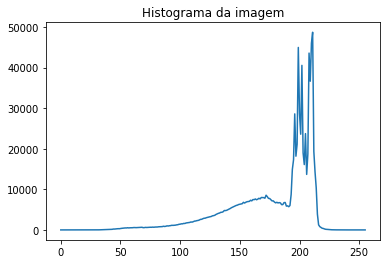

In [ ]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use a função calcHist da OpenCV para calcular o histograma
# Argumentos: imagem, indice da cor, mascara, qtd de barras, 
# intervalo de possiveis valores dos pixels

# calcula o histograma
# argumentos: imagem, indice da cor, mascara, qtd de barras, intervalo de possiveis valores dos pixels 
histograma = cv2.calcHist([imagem], [0], None, [256], [0,256])

##########################################################

# plota o histograma
plt.plot(histograma)
plt.title('Histograma da imagem')
plt.show()

Pelo gráfico mostrado acima, é possível observar que a maioria dos pixels contém um valor de tom de cinza entre 180 e 220, o que indica que a imagem possui baixo contraste. 

Outra forma de chegar nessa mesma conclusão, sem ter que olhar para o gráfico do histograma, é calculando algumas medidas estátistícas como máximo, mínimo, média, desvio padrão, mediana e a amplitude interquartil (IQR) do histograma. Abaixo, iremos criar uma função para calcular e mostrar essas estatisticas.

In [ ]:
def estatisticas(histograma):
    """
    Calcula e imprime as estatísticas do histograma
    """
    
    ################# COMPLETE O CÓDIGO AQUI  #################
    # Use as funções max, min, mean, std, median, percentile (75 e 25)  

    maximo = np.max(histograma)
    minimo = np.min(histograma)
    media = np.mean(histograma)
    std = np.std(histograma)
    mediana = np.median(histograma)

    firstQuartil = np.percentile(histograma, 25)
    secondQuartil = np.percentile(histograma, 75) 
    iqr = secondQuartil - firstQuartil
    
    ###########################################################

    print('Máximo: %1.3f' %(maximo))
    print('Mínimo: %1.3f' %(minimo))

    print('\nMédia: %1.3f' %(media))
    print('Desvio padrão: %1.3f' %(std))

    print('\nMediana: %1.3f' %(mediana))
    print('IQR: %1.3f' %(iqr))
    
# chama a função para imprimir as estatisticas do histograma
estatisticas(histograma)

Máximo: 48712.000
Mínimo: 0.000

Média: 4218.750
Desvio padrão: 7838.603

Mediana: 931.500
IQR: 5976.000


As estatísticas do histograma calculadas acima indicam que a imagem possui baixo contraste. Por exemplo, a quantidade máxima de pixels que possui o mesmo tom de cinza é bem maior que a média e a mediana. Outro indicativo é que o desvio padrão é muito maior que a média. Ainda, o IQR também está bem superior a mediana. 

Para ajudar a descobrir se os tons de cinza estão mais próximo de 0 (imagem escura) ou de 255 (imagem clara), podemos dividir o histograma em duas partes, calcular as estatísticas para cada parte separadamente e, depois, compará-las. Abaixo iremos calcular para a primeira parte. 

In [ ]:
# cria um novo histograma com a metade do original
histogramaParte1 = histograma[0:127]

# calcula as estísticas 
estatisticas(histogramaParte1)

Máximo: 3303.000
Mínimo: 0.000

Média: 793.724
Desvio padrão: 889.760

Mediana: 565.000
IQR: 1120.000


Agora, iremos calcular as estatísticas para a segunda metade do histograma.

In [ ]:
# cria um novo histograma com a metade do original
histogramaParte2 = histograma[127:]

# calcula as estísticas 
estatisticas(histogramaParte2)

Máximo: 48712.000
Mínimo: 0.000

Média: 7590.674
Desvio padrão: 9911.438

Mediana: 6015.000
IQR: 7482.000


A média da primeira metade do histograma foi de 793.724, enquanto que da segunda parte foi de 7590.674. O valor máximo da primeira parte também foi bastante inferior a da segunda parte. A mediana da primeira parte também apresentou um valor bem abaixo da segunda parte. Portanto, as estatísticas indicam que a maioria dos pixels possuem valores mais próximos de 255. Se essa análise comparativa entre as duas metades do histograma não fosse conclusiva, seria necessário dividir o histograma em mais partes. 

## Binarização da imagem

O histograma da imagem que analisamos acima, contém a maioria dos valores pixels com tom de cinza acima de 150. Podemos, alterar o realce dessa imagem fazendo a binarização dela. Para isso, iremos escolher o limiar de 150. Depois, teste outros limiares. 

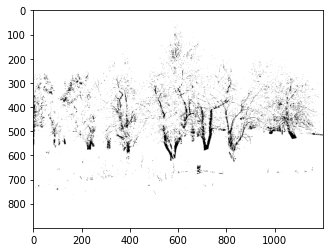

In [ ]:
limiar = 100

image = imagem.copy()

image[image <= 100] = 0
image[image > 100] = 255

plt.imshow(image, 'gray', vmax = 255,  vmin = 0)

## Histograma de uma imagem colorida

Para analisar o histograma de uma imagem colorida, é necessário analisar cada canal da imagem separadamente. Por exemplo, se a imagem estiver no formato RGB, é necessário analisar o histograma da cor vermelha, verde e azul separadamente. 

Abaixo, iremos carregar uma imagem em RGB e mostrar na tela.


## Equalização

A principal técnica para melhorar o histograma da imagem é a equalização. Antes de aplicar essa técnica, vamos abrir uma imagem em tons para tons de cinza e plotar seu histograma.